## Hands_On_ML: 캘리포니아 주택가격 예측

In [15]:
import pandas as pd
import numpy as np
import os

np.random.seed(425)

import matplotlib.pyplot as plt
import platform

%matplotlib inline

### 0. 데이터 가져오기

In [16]:
import os
import tarfile
from six.moves import urllib

#github에서 자동으로 불러오기
Download_root = "https://raw.githubusercontent.com/ExcelsiorCJH/Hands-On-ML/master/"
Housing_path = "datasets/housing"
Housing_url = Download_root + Housing_path + "/housing.tgz"
#tgz: 압축파일로 받아온다음에 압축파일 푸는 과정

def fetch_housing_data(housing_url = Housing_url, housing_path = Housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [17]:
#url주소 csv파일로 변환
def load_housing_data(housing_path = Housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [18]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---
### 1. 데이터 시각화

In [19]:
display(housing.info())
display(housing.describe())

#total_bedrooms: 207개의 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


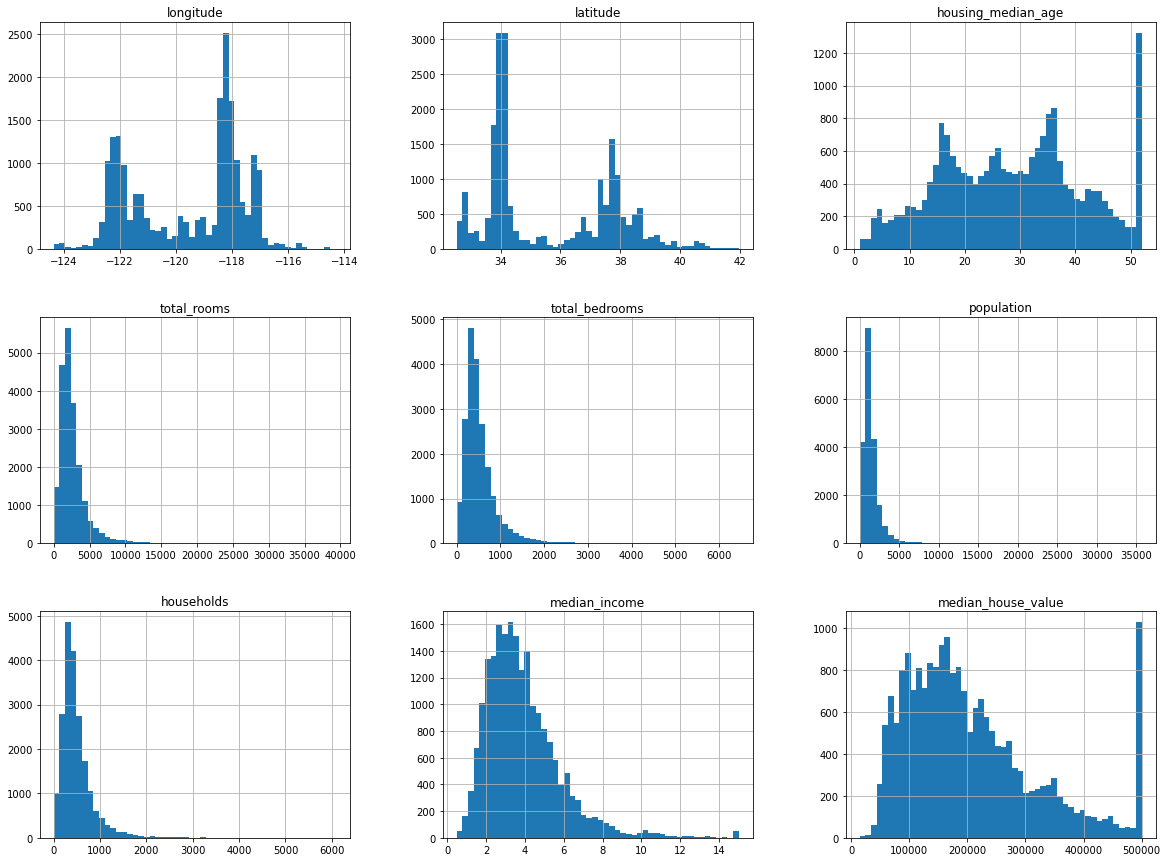

In [20]:
housing.hist(bins = 50, figsize = (20,15)) #housing의 컬럼 histogram 형태로 보여주기
plt.show()

- <b>median_income</b><br>
이미 scaling되어있음 (중간값이 $15이기는 현실적으로 불가능)<br>
어느정도 정규성이 보장되어 있는 데이터임
<br>

- <b>housing_median_age</b><br>
중간 주택 연도는 최댓값/최솟값 한정하거나 특정 값 초과/미만하는 데이터 제거
<br>

전체적으로:
- 첨도, 왜도가 상이함 ▶ 정규화/표준화 작업 필요
- 특성들의 스케일이 다 다름 ▶ 동일하게 스케일링 해줘야함

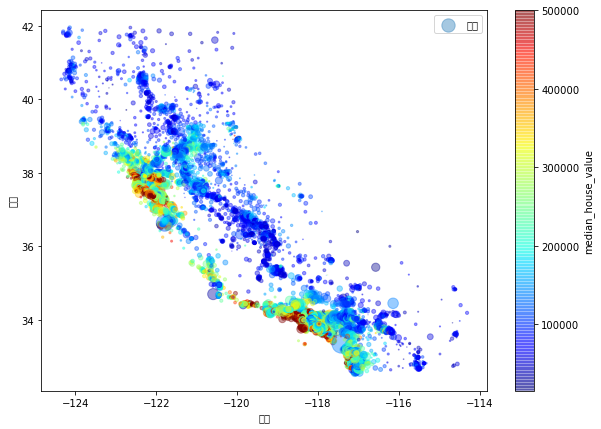

In [38]:
#경도와 위도 x,y scatterplot

#Shift+Tab을 누르면 함수의 도움말이 뜨게 됨
ax = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                 s = housing['population']/100, label = '인구', figsize=(10,7),
                 c = 'median_house_value', cmap = plt.get_cmap("jet"), colorbar = True, sharex = False)

ax.set(xlabel = '경도', ylabel = '위도');
plt.legend();

#1. 가격이 비싼집: Los Angles, Sandiago
#2. k값이 커질수록 점점 가격이 싸지는 경향을 보임 (y = x+k)

In [25]:
#상관계수 매트릭스(correlation matrix)
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [26]:
#median_house_value(주택가격) 기준으로 내림차순 정렬
#주택가격과 선형성이 있는지 확인가능
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

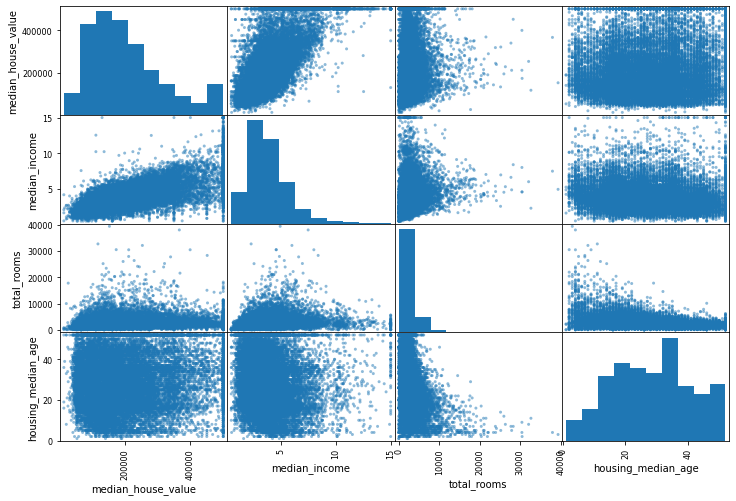

In [36]:
#상관계수 plotting
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income",
              "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize = (12,8));

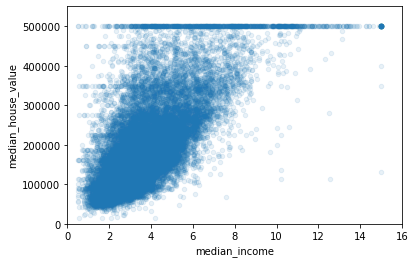

In [35]:
#더 구체적으로 봤을 때 median_house_value와 median_income 상관관계 보기
housing.plot(kind = "scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000]);

#; = 종결 의미, 함수 자체에 대한 출력을 제거하기 위함

In [32]:
#새로운 변수 추가

#1. 집집마다 있는 방의 개수
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

#2. 방마다 있는 침실의 개수
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

#3. 집마다 있는 인구수
housing['population_per_household'] = housing['population']/housing['households']

#새로운 변수 추가해서 주택가격과 선형성 있는지 확인(median_income 가장 큰 연관성)
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### 2. 데이터 분할

#### 랜덤 샘플링(8:2)

In [40]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [41]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [42]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,5.492991,NaN,2.483645


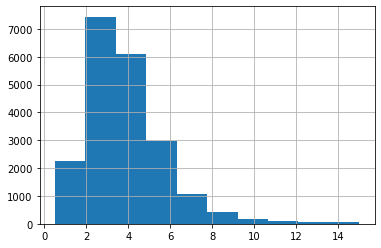

In [44]:
housing["median_income"].hist();

#소득별 빈도가 상이함
#이러한 경우에 랜덤하게 뽑는 경우는 옳지 않음

#### 계층적 샘플링(8:2)

In [45]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

#5보다 큰 데이터는 그냥 5.0으로 대체
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
# inplace=True : housing['income_cat'] 데이터 갱신이 일어나게끔 함

In [46]:
housing['income_cat'].value_counts() #데이터 5계층으로 분류

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

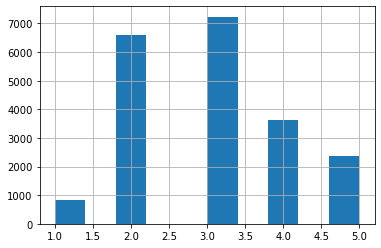

In [47]:
housing['income_cat'].hist();

In [48]:
#계층별 비중에 따라 sampling 진행
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#income_cat 기준으로 split함
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [49]:
display(housing['income_cat'].value_counts()/len(housing))
print('='*20)
display(strat_test_set['income_cat'].value_counts()/len(strat_test_set))
#비슷한 비중으로 샘플링 되었음 확인가능

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

#### 계층별 비중의 오차 테이블

In [51]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall" : income_cat_proportions(housing),
    "Stratified" : income_cat_proportions(strat_test_set),
    "Random" : income_cat_proportions(test_set),
}).sort_index()

compare_props['Rand. %error'] = 100*compare_props["Random"] / compare_props["Overall"] - 100
compare_props['Strat. %error'] = 100*compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


In [56]:
#필요없는 income_cat 특성 제거
for set_ in (strat_train_set, strat_test_set, housing):
    set_.drop("income_cat", axis=1, inplace=True)

housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

### 3. 데이터 전처리
#### NULL값 제거

In [59]:
housing = strat_train_set.drop(columns=['median_house_value']) #train X(주택가격 제외)
housing_labels = strat_train_set['median_house_value'].copy() #train Y(주택가격만 포함)

In [60]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16354 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   ocean_proximity           16512 non-null  object 
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16354 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.3+ MB


In [62]:
housing[housing['bedrooms_per_room'].isna()==True]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2.571135,NaN,2.254446
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,6.371389,NaN,4.178817
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,5.064767,NaN,2.588083
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,5.511509,NaN,2.657289
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,4.866192,NaN,2.468327
...,...,...,...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN,3.327698,NaN,2.452536
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN,4.881783,NaN,2.164729
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND,5.835366,NaN,4.768293
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN,4.749585,NaN,2.328358


In [63]:
#ocean_proximity 변수 제거
from sklearn.impute import SimpleImputer

housing_num = housing.drop('ocean_proximity', axis=1)

In [64]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [69]:
print('imputer.statistics_ :', list(map(lambda x: "%2f"%x, imputer.statistics_)))
print('housing_num.median().values :', list(map(lambda x: "%2f"%x, housing_num.median().values)))

imputer.statistics_ : ['-118.510000', '34.260000', '29.000000', '2119.500000', '433.000000', '1164.000000', '408.000000', '3.540900', '5.232284', '0.203031', '2.817653']
housing_num.median().values : ['-118.510000', '34.260000', '29.000000', '2119.500000', '433.000000', '1164.000000', '408.000000', '3.540900', '5.232284', '0.203031', '2.817653']


In [75]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing.index.values)

In [76]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   rooms_per_household       16512 non-null  float64
 9   bedrooms_per_room         16512 non-null  float64
 10  population_per_household  16512 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


#### 이상치 제거

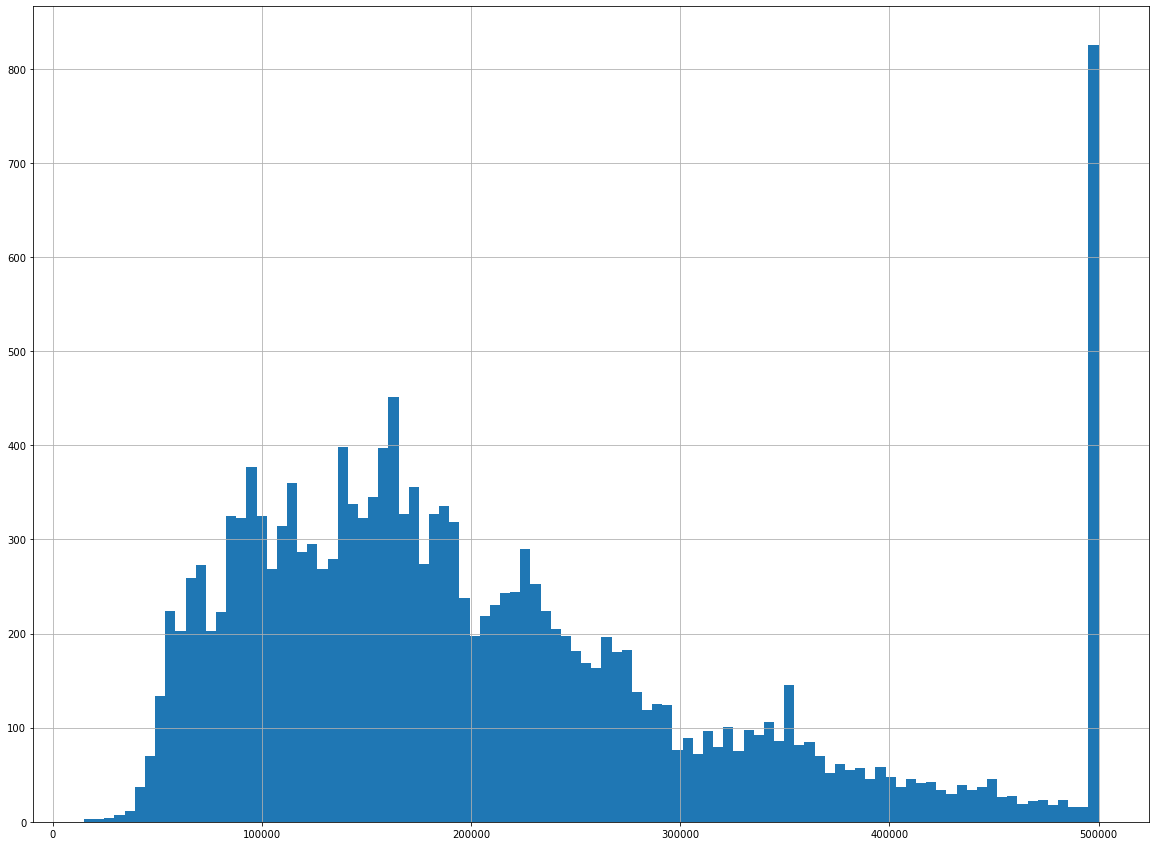

In [61]:
#단일값 제거
housing_labels.hist(bins = 100, figsize = (20,15))
plt.show()

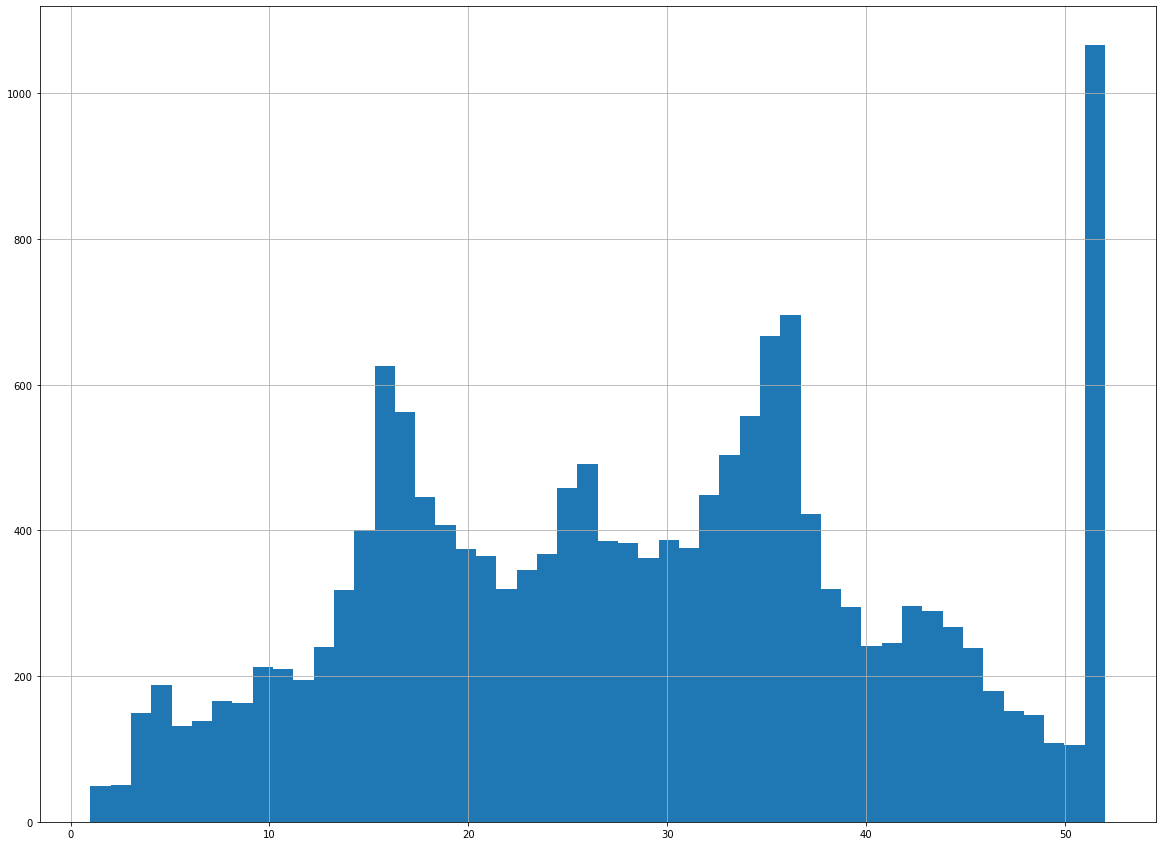

In [77]:
housing_tr['housing_median_age'].hist(bins = 50, figsize = (20,15))
plt.show()

In [79]:
housing_tr[housing_tr['housing_median_age'] == max(housing_tr['housing_median_age'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,8.061372,0.141961,2.776173
16121,-122.46,37.79,52.0,2059.0,416.0,999.0,402.0,3.7419,5.121891,0.202040,2.485075
2651,-124.10,40.47,52.0,1196.0,236.0,965.0,265.0,3.5345,4.513208,0.197324,3.641509
16131,-122.48,37.79,52.0,4683.0,1055.0,2246.0,975.0,4.1148,4.803077,0.225283,2.303590
533,-122.27,37.78,52.0,1222.0,264.0,630.0,265.0,3.7708,4.611321,0.216039,2.377358
...,...,...,...,...,...,...,...,...,...,...,...
15670,-122.44,37.80,52.0,1006.0,291.0,445.0,257.0,2.7717,3.914397,0.289264,1.731518
11878,-117.38,33.99,52.0,1797.0,332.0,905.0,313.0,2.7054,5.741214,0.184752,2.891374
108,-122.24,37.82,52.0,3481.0,751.0,1444.0,718.0,3.9000,4.848189,0.215743,2.011142
5364,-118.42,34.04,52.0,1358.0,272.0,574.0,267.0,5.6454,5.086142,0.200295,2.149813


In [81]:
housing_labels[housing_labels.values == max(housing_labels.values)]

8879     500001.0
4861     500001.0
15614    500001.0
18086    500001.0
16121    500001.0
           ...   
8667     500001.0
5306     500001.0
18067    500001.0
5364     500001.0
15775    500001.0
Name: median_house_value, Length: 786, dtype: float64

In [83]:
#집합연산으로 처리

X_index = housing_tr[housing_tr['housing_median_age'] == max(housing_tr['housing_median_age'])].index
y_index = housing_labels[housing_labels.values ==max(housing_labels.values)].index

X_minus_y = set(X_index) - set(y_index)
y_minus_X = set(y_index) - set(X_index)
X_union_y = set(y_index).union(set(X_index))

#교집합
print("Variable_index - Target_index : ", len(X_minus_y))
print("Target_index - Variable_index : ", len(y_minus_X))

#합집합 처리
print("Union of Variable_index & Target_index : ", len(X_union_y))

Variable_index - Target_index :  887
Target_index - Variable_index :  646
Union of Variable_index & Target_index :  1673


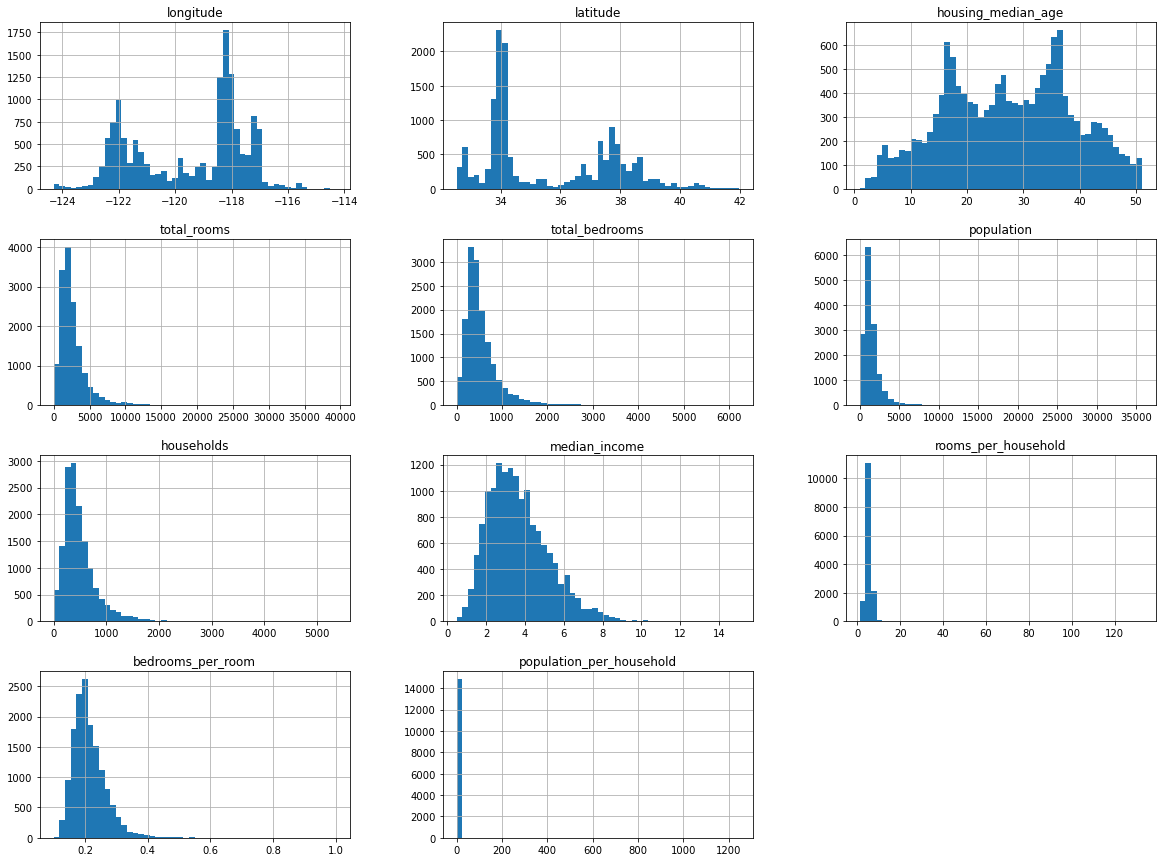

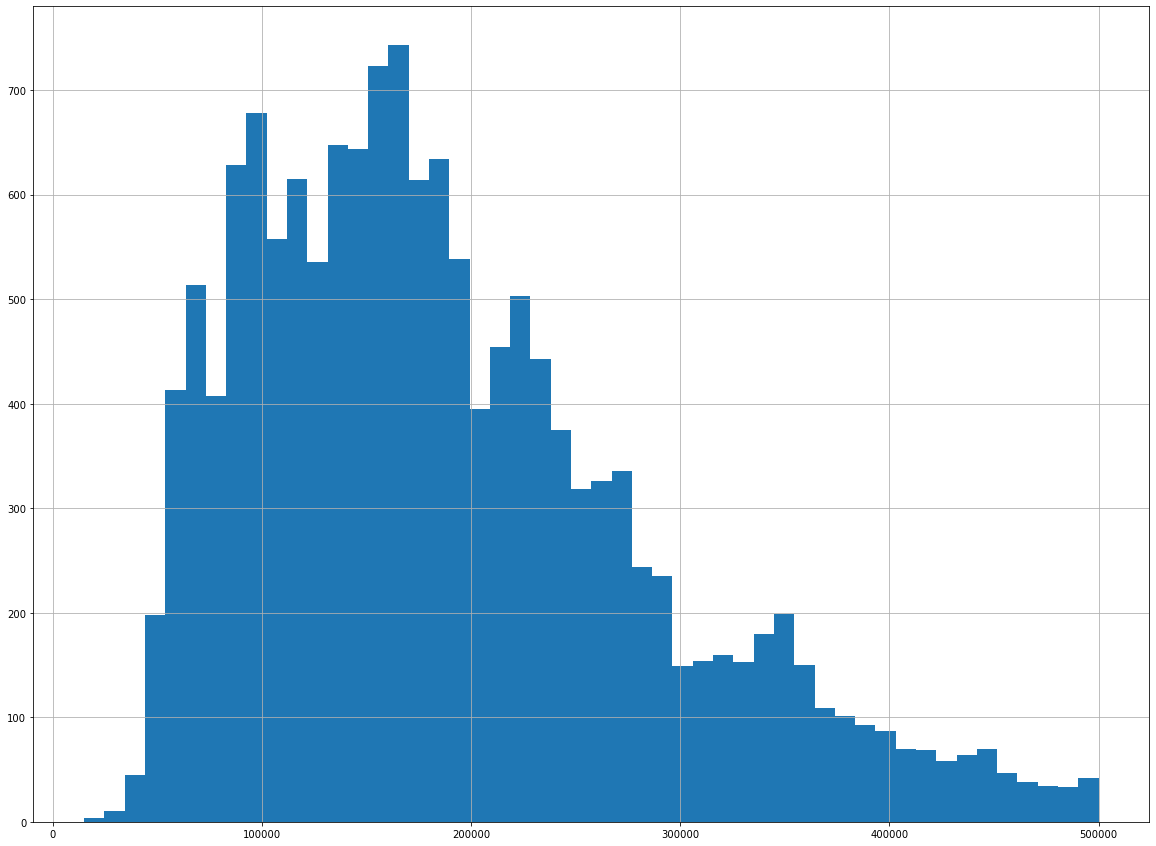

In [84]:
#housing_median_age 최댓값 + housing_median_value 최댓값 모두 제거
tmp_x = housing_tr.drop(index = list(X_union_y))
tmp_y = housing_labels.drop(index = list(X_union_y))

tmp_x.hist(bins = 50, figsize = (20,15))
plt.show()

tmp_y.hist(bins = 50, figsize = (20,15))
plt.show()

#### 특성 스케일링
- 정규화(0과 1 사이의 값으로 변환): min-max scaling
    - 이진적인 속성을 갖는 분포에 적합 (딥러닝의 시그모이드 함수) - 2개 속성 중에서 하나를 고르는 경우
    - False/True 분류에 robust한 특징
<br>
<br>

- 표준화(표준정규분포 활용, 표준정규분포에 알맞게 값 베팅): z-score
    - 이상치에 robust한 특징

In [85]:
#가장 큰 값=1, 가장 작은값=0으로 변환
from sklearn.preprocessing import MinMaxScaler

data = [[-1,2], [-0.5,6], [0,10], [1,18]]
scaler = MinMaxScaler()

print(scaler.fit(data))
print("max of data = ", scaler.data_max_)
print("min of data = ", scaler.data_min_)
print("data range = ", scaler.data_range_)
print("<data scaling> \n", scaler.transform(data))
print("[2,2] minmax scaling ", scaler.transform([[2,2]]))

MinMaxScaler()
max of data =  [ 1. 18.]
min of data =  [-1.  2.]
data range =  [ 2. 16.]
<data scaling> 
 [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[2,2] minmax scaling  [[1.5 0. ]]


In [86]:
#(원값 - 평균값)/(표준편차)로 나누어서 z-score로 표현

from sklearn.preprocessing import StandardScaler

data = [[-1,2], [-0.5,6], [0,10], [1,18]]
scaler = StandardScaler()

print(scaler.fit(data))
print("mean = ", scaler.mean_)
print("variance = ", scaler.var_)
print("z-score \n", scaler.transform(data))
print("[2,2] standard scaling ", scaler.transform([[2,2]]))

StandardScaler()
mean =  [-0.125  9.   ]
variance =  [ 0.546875 35.      ]
z-score 
 [[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]
[2,2] standard scaling  [[ 2.87352447 -1.18321596]]


In [87]:
scalar = StandardScaler()
scaler.fit(tmp_x)
#tmp_x: 이상치가 제거된 attributes

tmp_prepared = scaler.transform(tmp_x) #모든 값 z-score로 표준화

#데이터 pandas 데이터프레임 형태로 변환
prepared = pd.DataFrame(tmp_prepared, columns = tmp_x.columns, index = tmp_x.index)
prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
17606,-1.214829,0.786986,0.966949,-0.499019,-0.460835,-0.659574,-0.436538,-0.628754,-0.314172,0.182558,-0.086325
18632,-1.235049,0.675370,-1.136585,-0.906917,-1.039003,-1.012073,-1.024486,1.738926,0.250719,-1.003283,-0.035483
14650,1.155914,-1.315121,0.353418,-0.322830,-0.175320,-0.462384,-0.116548,-0.528179,-0.477603,0.501717,-0.091995
3230,-0.062314,0.331219,-0.172465,-0.371007,-0.413249,-0.005183,-0.400116,-1.151246,-0.066357,-0.238117,0.082848
3555,0.453285,-0.636122,-0.873643,1.806129,2.332455,2.611509,2.487595,-0.418241,-0.362990,0.319618,-0.007319


#### 범주형 데이터 처리

In [88]:
set(housing['ocean_proximity'])
#서로 독립적인 벡터 형태로 만들어줘야함

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [89]:
housing_cat = pd.get_dummies(housing['ocean_proximity'])
housing_cat = housing_cat.loc[tmp_x.index] #이상치 제거한 tmp_x 사용
housing_cat

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0
...,...,...,...,...,...
7364,1,0,0,0,0
6563,0,1,0,0,0
12053,0,1,0,0,0
13908,0,1,0,0,0


In [90]:
housing = pd.concat([prepared, housing_cat], axis = 1)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,-1.214829,0.786986,0.966949,-0.499019,-0.460835,-0.659574,-0.436538,-0.628754,-0.314172,0.182558,-0.086325,1,0,0,0,0
18632,-1.235049,0.675370,-1.136585,-0.906917,-1.039003,-1.012073,-1.024486,1.738926,0.250719,-1.003283,-0.035483,1,0,0,0,0
14650,1.155914,-1.315121,0.353418,-0.322830,-0.175320,-0.462384,-0.116548,-0.528179,-0.477603,0.501717,-0.091995,0,0,0,0,1
3230,-0.062314,0.331219,-0.172465,-0.371007,-0.413249,-0.005183,-0.400116,-1.151246,-0.066357,-0.238117,0.082848,0,1,0,0,0
3555,0.453285,-0.636122,-0.873643,1.806129,2.332455,2.611509,2.487595,-0.418241,-0.362990,0.319618,-0.007319,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7364,0.650425,-0.757040,1.405185,-0.839928,-0.791556,-0.563597,-0.839776,-1.147551,-0.372019,0.788662,0.109410,1,0,0,0,0
6563,0.685810,-0.650074,1.668126,-0.635291,-0.734453,-0.779110,-0.772136,0.789739,0.268493,-0.516039,-0.033775,0,1,0,0,0
12053,0.973938,-0.798896,1.142243,-0.669703,-0.596454,-0.361172,-0.647262,-1.033855,-0.309971,0.584594,0.078004,0,1,0,0,0
13908,1.560306,-0.701232,-1.574821,1.009146,0.778777,0.551486,0.671719,-0.266901,0.388547,-0.627164,-0.032622,0,1,0,0,0


### 4. 데이터 훈련/평가
- 선형 회귀 모델
- 의사결정나무 모델

In [91]:
#선형회귀모델
from sklearn.linear_model import LinearRegression

housing_prepared = np.array(housing)
housing_labels = tmp_y

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [92]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print('RMSE : ', lin_rmse)

RMSE :  58244.36758810236


In [93]:
#의사결정나무 모델(수직으로 데이터 자르는 형태)
#RMSE = 0.0인 경우는 training에서 문제 발생 ▶ 과적합 발생
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [94]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

print('RMSE : ', tree_rmse)

RMSE :  0.0


#### Cross Validation

In [96]:
#CrossValidation - 선형 회귀 모델
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("점수 : ", scores)
    print("평균 : ", scores.mean())
    print("표준편차 : ", scores.std())

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 :  [56722.17148984 58053.7705809  57735.81527587 64063.65140457
 58965.20314997 59435.21574818 54764.97078541 58147.54954935
 60177.86191379 57146.94472927]
평균 :  58521.31546271383
표준편차 :  2338.9128425062927


In [97]:
#CrossValidation - 의사결정나무 모델

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)

tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

점수 :  [63986.98017625 61049.08695076 62808.80369902 64873.16710299
 65394.74630019 66622.63720899 61722.58499871 61394.71111228
 63128.14033714 62623.58910782]
평균 :  63360.444699414715
표준편차 :  1739.294558044397


: 평균이 더 크더라도 표준편차가 더 작은 의사결정나무 모델이 더 좋은 모델임